In [2]:
caminho = "C:/Users/Ivan/Downloads/IDEs/WPy64-3920/notebooks/tads/tcc/coletas/parafuso1.xls"

In [3]:
import pandas as pd

In [4]:
dados = pd.read_excel(caminho, sheet_name=["cel1"])

In [5]:
sinalCel = dados["cel1"].cel1

In [6]:
tempoBalanca = dados["cel1"].tempoBalancaSeg

In [7]:
sinalSensor = dados["cel1"].pinoSensor

In [8]:
tempoMotor = dados["cel1"].tempoMotorSeg

In [9]:
from scipy import signal
import matplotlib.pyplot as plt

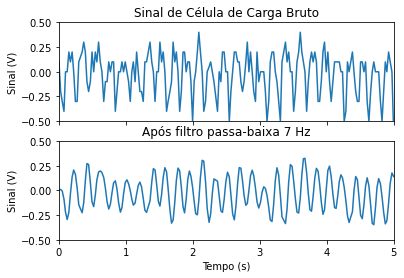

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(tempoBalanca[0:199], sinalCel[0:199])
ax1.set_title('Sinal de Célula de Carga Bruto')
ax1.axis([0, 5, -.5, .5])
ax1.set_ylabel('Sinal (V)')
sos = signal.butter(4, 7, 'lp', fs=40, output='sos')
filtered = signal.sosfilt(sos, sinalCel[0:199])
ax2.plot(tempoBalanca[0:199], filtered)
ax2.set_title('Após filtro passa-baixa 7 Hz')
ax2.axis([0, 5, -.5, .5])
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Sinal (V)')
#plt.tight_layout()
#plt.show()
plt.savefig("ProcessamentoSinal.png",dpi=500)

In [11]:
import numpy as np
indexCiclos = np.zeros(len(filtered),int)
valoresCiclos = []
tempoCiclos = []
cont = 0
for sample in filtered[1:-1]:
    cont += 1
    if (sample > filtered[cont-1] and sample > filtered[cont+1]) or (sample < filtered[cont-1] and sample < filtered[cont+1]):
        indexCiclos[cont] = 1
        valoresCiclos.append(filtered[cont])
        tempoCiclos.append(tempoBalanca[cont])        
sum(indexCiclos)

53

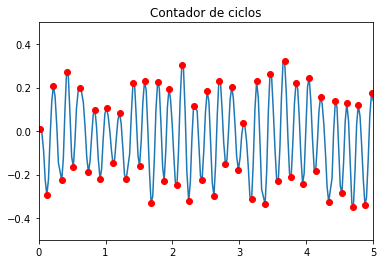

In [12]:
plt.plot(tempoBalanca[0:199],filtered)
plt.plot(tempoCiclos,valoresCiclos,'or')
plt.title("Contador de ciclos")
plt.axis([0, 5, -.5, .5])
plt.savefig("sinalCiclos.png",dpi=500)

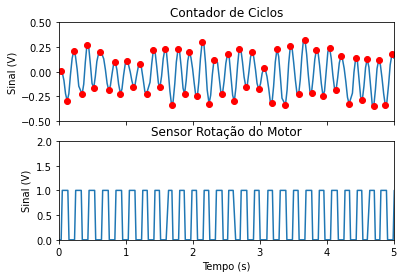

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(tempoBalanca[0:199],filtered)
ax1.plot(tempoCiclos,valoresCiclos,'or')
ax1.set_title('Contador de Ciclos')
ax1.axis([0, 5, -.5, .5])
ax1.set_ylabel('Sinal (V)')
ax2.plot(tempoMotor[0:297],sinalSensor[0:297])
ax2.set_title('Sensor Rotação do Motor')
ax2.axis([0, 5, 0, 2])
ax2.set_ylabel('Sinal (V)')
ax2.set_xlabel('Tempo (s)')
#plt.tight_layout()
#plt.show()
plt.savefig("ciclosMotor.png",dpi=500)